# Computational Theory Notebook
Welcome to my notebook for computational theory. In this document, I will provide the explanations of my solutions to the 5 problems on the [Secure Hash Standard](https://nvlpubs.nist.gov/nistpubs/FIPS/NIST.FIPS.180-4.pdf)

## Introduction
The Secure Hash Standard specifies hash algorithms that can be used to generate digests of messages. This notebook involves the implementation of 5 problems that build on each other to finally result in a functional SHA256 implementation. 

**Problem 1: Implementing the fundamental bitwise functions used in SHA-256:** 
- parity(x,y,z)
- ch(x,y,x)
- maj(x,y,z)
- Sigma0(x), Sigma1(x)
- sigma0(x), sigma1(x)

**Problem 2: Fractional parts of of cube roots** 
- Extracts the first 32 bits of the first 64 primes
- Returns hexadecimal

**Problem 3: Padding** 
- block_parse(msg) function to apply padding to any size message and yields 512 bit blocks

**Problem 4: Hashes** 
- The hash(current, block) function is the heart of SHA-256. It takes the current hash state and one 512-bit block, processes it through 64 rounds of operations, and outputs an updated hash state.

**Problem 5: Passwords** 
- Cracks 3 common passwords hashed with SHA-256 with a brute force attack.
- Outlines improvements to be made for hashing passwords 


## Problem 1: Binary Words and Operations

The following logical functions perform numerous bitwise operations on 32 bit integers as defined in the Secure Hash Standard. 
For parity, ch, and maj functions, the formula is as follows according to the SHS

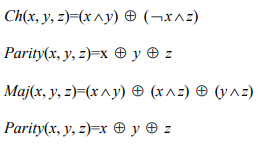

For Sigma0(x),Sigma1(x), and sigma0(x), sigma1(x) the formula is as follows according to the SHS

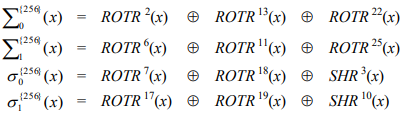

### Parity Function Implementation

In [3]:
import numpy as np
#Parity Function takes in 3 Integers and XOR's them using the "^" operator
def parity(x,y,z):
    #All variables are 32 bit signed integers
    result = np.int32(x)^np.int32(y)^np.int32(z)
    return result

#Prints the parity of 3,2,1
print(parity(3,2,1))

0


### Ch Function Implementation

In [4]:
#The ch function is passed x,y,z and computes the XOR of AND(x,y) and the AND of NOT X and Z
def ch(x,y,z):
    #32 bit inetegrs
    x=np.int32(x)
    y=np.int32(y)
    z=np.int32(z)
    
    ##calcualtes result
    result = np.bitwise_xor(np.bitwise_and(x,y),np.bitwise_and(np.bitwise_not(x),z))

    return result

print(ch(3,2,1))

2


### Maj Function Implementation

In [5]:
def maj(x,y,z):
     #32 bit inetegrs
    x=np.int32(x)
    y=np.int32(y)
    z=np.int32(z)

    result = np.bitwise_xor(np.bitwise_xor(np.bitwise_and(x,y),np.bitwise_and(x,z)),np.bitwise_and(y,z))

    return result
print(maj(3,2,1))

3


### Sigma0(x) Function Implementation

In [6]:
#ROTR function to rotate right the 32bit integer by n
def rotr(x,n,bits=32):
    # SHA-256 uses unsigned 32-bit 
    x=np.uint32(x)
    #Check if n is within the boundary(>=0 and <=bits length)
    if(n>=0 and n<=bits):
        x=(x>>n)|(x << (bits - n))

    return x
#Function Sigma0 calculates x by getting XOR of XOR(rotr(x,2),(x,13)) and XOR of rotr(x,22)
def Sigma0(x):
    x=np.uint32(x)

    result = np.bitwise_xor(np.bitwise_xor(rotr(x,2),rotr(x,13)),rotr(x,22)) 

    return result

print(Sigma0(5))


1076368385


### Sigma1(x) Function Implementation

In [7]:
#Function Sigma1 calculates x by getting XOR of XOR(rotr(x,6),(x,11)) and XOR of rotr(x,25)
def Sigma1(x):
    x=np.uint32(x)

    result = np.bitwise_xor(np.bitwise_xor(rotr(x,6),rotr(x,11)),rotr(x,25)) 

    return result

print(Sigma1(5))

346030720


### sigma0(x) Function Implementation

In [8]:
#Function sigma0 calculates x by getting XOR of XOR(rotr(x,7),(x,17)) and right Shift of (x,3)
def sigma0(x):
    x=np.uint32(x)

    result = np.bitwise_xor(np.bitwise_xor(rotr(x,7),rotr(x,18)),np.bitwise_right_shift(x,3)) 

    return result

print(sigma0(5))

167854080


### sigma1(x) Function Implementation

In [9]:
#Function sigma1 calculates x by getting XOR of XOR(rotr(x,17),(x,19)) and right Shift of (x,10)
def sigma1(x):
    x=np.uint32(x)

    result = np.bitwise_xor(np.bitwise_xor(rotr(x,17),rotr(x,19)),np.bitwise_right_shift(x,10)) 

    return result

print(sigma1(5))

139264


## Problem 2: Fractional Parts of Cube Roots


*Function to generate n prime numbers*

Creates a list of primes starting at 2

In [10]:
def primes(n):

    if n <= 0:
        return []
    
    primes_list = []
    num = 2  # The first prime number
    
    while len(primes_list) < n:
        # Check if num is prime
        for p in primes_list:
            if num % p == 0:
                break
        else:
            primes_list.append(num)
            
        num += 1
    
    return primes_list

print(primes(10))

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]


*Get the cube root of the first 64 prime numbers*

Raises each prime from primes list to return the cube root of each prime number

In [11]:
def cubeRoots(n):
    
    cubeRoots_List = []
    result=0
    
    for p in primes(n):
        result = (p**(1/3))
        cubeRoots_List.append(result)
    
    return cubeRoots_List
        
print(cubeRoots(64))

[1.2599210498948732, 1.4422495703074083, 1.7099759466766968, 1.912931182772389, 2.2239800905693152, 2.3513346877207573, 2.571281590658235, 2.668401648721945, 2.8438669798515654, 3.072316825685847, 3.1413806523913927, 3.332221851645953, 3.4482172403827303, 3.503398060386724, 3.6088260801386944, 3.756285754221072, 3.8929964158732604, 3.9364971831021727, 4.0615481004456795, 4.140817749422853, 4.179339196381232, 4.290840427026207, 4.362070671454838, 4.464745095584537, 4.594700892207039, 4.657009507803835, 4.687548147653597, 4.7474593985234, 4.776856181035017, 4.834588127111639, 5.026525695313479, 5.0787530781327, 5.155136735475772, 5.180101467380292, 5.301459192380904, 5.325074021614986, 5.394690712109591, 5.462555571281397, 5.506878446387352, 5.5720546555426225, 5.635740794544236, 5.65665282582291, 5.758965220492401, 5.778996565152129, 5.818647867496961, 5.838272460814002, 5.953341813139051, 6.064126994506963, 6.100170200393062, 6.11803317263662, 6.153449493663682, 6.205821794895751, 6.22

*Extract first 32 bits of fractional part as binary*

- Converts fractional part of cube root to 32-bit binary string using the doubling algorithm:
  - Multiply fraction by 2
  - If result ≥ 1: append '1' and subtract 1
  - If result < 1: append '0'
  - Repeat 32 times

In [12]:

def fraction_to_binary(fraction, bits=32):
    """Convert fractional part to binary string with given bit length."""
    binary = ''
    frac = fraction
    for _ in range(bits):
        frac *= 2
        if frac >= 1:
            binary += '1'
            frac -= 1
        else:
            binary += '0'
    return binary

def extractBitsFromFraction():
    """For each cube root of the first 64 primes, extract first 32 bits of fractional part."""
    bits_list = []
    
    for c in cubeRoots(64):
        fraction = c % 1  # extract fractional part
        binary_fraction = fraction_to_binary(fraction, 32)
        bits_list.append(binary_fraction)
    
    return bits_list

print(extractBitsFromFraction())

['01000010100010100010111110011000', '01110001001101110100010010010001', '10110101110000001111101111001111', '11101001101101011101101110100101', '00111001010101101100001001011011', '01011001111100010001000111110001', '10010010001111111000001010100100', '10101011000111000101111011010101', '11011000000001111010101010011000', '00010010100000110101101100000001', '00100100001100011000010110111110', '01010101000011000111110111000011', '01110010101111100101110101110100', '10000000110111101011000111111110', '10011011110111000000011010100111', '11000001100110111111000101110100', '11100100100110110110100111000001', '11101111101111100100011110000110', '00001111110000011001110111000110', '00100100000011001010000111001100', '00101101111010010010110001101111', '01001010011101001000010010101010', '01011100101100001010100111011100', '01110110111110011000100011011010', '10011000001111100101000101010010', '10101000001100011100011001101101', '10110000000000110010011111001000', '10111111010110010111111111

**Display as hexadecimal**
- Convert binary values to hexadecimal
- Build a list of the 64 binary values

In [13]:
def binary_to_hex(binary_str):
    """Convert 32-bit binary hexadecimal"""
    return hex(int(binary_str, 2))[2:]



binary_list = extractBitsFromFraction()


hex_list = [binary_to_hex(b) for b in binary_list]

print(hex_list)


['428a2f98', '71374491', 'b5c0fbcf', 'e9b5dba5', '3956c25b', '59f111f1', '923f82a4', 'ab1c5ed5', 'd807aa98', '12835b01', '243185be', '550c7dc3', '72be5d74', '80deb1fe', '9bdc06a7', 'c19bf174', 'e49b69c1', 'efbe4786', 'fc19dc6', '240ca1cc', '2de92c6f', '4a7484aa', '5cb0a9dc', '76f988da', '983e5152', 'a831c66d', 'b00327c8', 'bf597fc7', 'c6e00bf3', 'd5a79147', '6ca6351', '14292967', '27b70a85', '2e1b2138', '4d2c6dfc', '53380d13', '650a7354', '766a0abb', '81c2c92e', '92722c85', 'a2bfe8a1', 'a81a664b', 'c24b8b70', 'c76c51a3', 'd192e819', 'd6990624', 'f40e3585', '106aa070', '19a4c116', '1e376c08', '2748774c', '34b0bcb5', '391c0cb3', '4ed8aa4a', '5b9cca4f', '682e6ff3', '748f82ee', '78a5636f', '84c87814', '8cc70208', '90befffa', 'a4506ceb', 'bef9a3f7', 'c67178f2']


## Problem 3: Padding

**The block_parse(msg) function prepares a message of any length to be processed by SHA-256, which requires fixed 512-bit (64-byte) blocks.**

The problem is that SHA-256 can only process 512 bit blocks, but messages can be any size

- "abc" = 24 bits
- Email = 5,000 bits
- File = 1,000,000 bits

We need to:

- Pad the message to a multiple of 512 bits
- Split it into 512-bit blocks
- Yield one block at a time (generator function)

In [14]:
def block_parse(msg):
    
    # Get the original message length in bits
    msg_len_bits = len(msg) * 8
    
    # Step 1: Append the '1' bit (0x80 in bytes)
    msg = msg + b'\x80'
    
    
    # Step 2: Calculate how many zero bytes we need
    # We need the message length to be congruent to 448 mod 512 (in bits)
    # or 56 mod 64 (in bytes) before adding the 8-byte length field
    current_len = len(msg)
    
    # Calculate padding needed to reach 56 bytes mod 64
    if current_len % 64 <= 56:
        padding_len = 56 - (current_len % 64)
    else:
        padding_len = 64 + 56 - (current_len % 64)
    
    # Add zero padding
    msg = msg + (b'\x00' * padding_len)
    
    # Step 3: Append the original message length as a 64-bit big-endian integer
    msg = msg + msg_len_bits.to_bytes(8, byteorder='big')
    
    # Step 4: Yield 512-bit (64-byte) blocks
    for i in range(0, len(msg), 64):
        yield msg[i:i+64]
        
    
for block in block_parse(b"abc"):
    print(block.hex())

61626380000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000018


## Problem 4: Hashes

**The hash(current, block) function is the heart of SHA-256. It takes the current hash state and one 512-bit block, processes it through 64 rounds of operations, and outputs an updated hash state.**

**What it does:**

Takes two inputs:
- current - The current hash value (8 words/numbers, each 32 bits)
    - For first block: use H(0) - the initial SHA-256 values
    - For subsequent blocks: use output from previous block

- block - One 512-bit (64-byte) message block from block_parse()

Returns:
- Updated hash value (8 words) to use for next block

In [15]:
K = [int(h, 16) for h in hex_list]

def hash(current, block):
    """
    Calculates the next hash value given the current hash value and next message block.
    Implements SHA-256 Hash Computation according to section 6.2.2 
    
    Args:
        current: List or array of 8 uint32 values representing H(i-1)
        block: bytes object of exactly 64 bytes (512 bits) representing M(i)
        
    Returns:
        List of 8 uint32 values representing H(i)
    """
    
    
    # Step 1: Prepare the message schedule {Wt}
    W = []
    
    # First 16 words come directly from the message block (big-endian)
    for t in range(16):
        word = int.from_bytes(block[t*4:(t+1)*4], byteorder='big')
        W.append(np.uint32(word))
    
    # Remaining 48 words are computed
    for t in range(16, 64):
        s0 = sigma0(W[t-15])
        s1 = sigma1(W[t-2])
        Wt = np.uint32(W[t-16] + s0 + W[t-7] + s1)
        W.append(Wt)
    
    # Step 2: Initialize the eight working variables with (i-1)st hash value
    a = np.uint32(current[0])
    b = np.uint32(current[1])
    c = np.uint32(current[2])
    d = np.uint32(current[3])
    e = np.uint32(current[4])
    f = np.uint32(current[5])
    g = np.uint32(current[6])
    h = np.uint32(current[7])
    
    # Step 3: For t=0 to 63
    for t in range(64):
        T1 = np.uint32(h + Sigma1(e) + ch(e, f, g) + K[t] + W[t])
        T2 = np.uint32(Sigma0(a) + maj(a, b, c))
        
        h = g
        g = f
        f = e
        e = np.uint32(d + T1)
        d = c
        c = b
        b = a
        a = np.uint32(T1 + T2)
    
    # Step 4: Compute the ith intermediate hash value H(i)
    H = [
        np.uint32(current[0] + a),
        np.uint32(current[1] + b),
        np.uint32(current[2] + c),
        np.uint32(current[3] + d),
        np.uint32(current[4] + e),
        np.uint32(current[5] + f),
        np.uint32(current[6] + g),
        np.uint32(current[7] + h)
    ]
    
    return H


# Test with initial hash value from section 5.3.3
H0 = [
    0x6a09e667, 0xbb67ae85, 0x3c6ef372, 0xa54ff53a,
    0x510e527f, 0x9b05688c, 0x1f83d9ab, 0x5be0cd19
]

# Test with "abc" message block (block_parse test)
test_block = bytes.fromhex('61626380000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000018')

result = hash(H0, test_block)
print("Hash result for 'abc':")
print(''.join(f'{h:08x}' for h in result))


Hash result for 'abc':
ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad


C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:29: RuntimeWarning: overflow encountered in scalar add
  Wt = np.uint32(W[t-16] + s0 + W[t-7] + s1)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:44: RuntimeWarning: overflow encountered in scalar add
  T1 = np.uint32(h + Sigma1(e) + ch(e, f, g) + K[t] + W[t])
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:50: RuntimeWarning: overflow encountered in scalar add
  e = np.uint32(d + T1)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:54: RuntimeWarning: overflow encountered in scalar add
  a = np.uint32(T1 + T2)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:59: RuntimeWarning: overflow encountered in scalar add
  np.uint32(current[1] + b),
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:61: RuntimeWarning: overflow encountered in scalar add
  np.uint32(current[3] + d),
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:63: RuntimeWarning: over

In [16]:
def sha256(message):
    """
    Complete SHA-256 hash function.
    Takes a bytes object and returns the hex digest string.
    """
    # Initial hash value H(0) for SHA-256
    H0 = [
        0x6a09e667, 0xbb67ae85, 0x3c6ef372, 0xa54ff53a,
        0x510e527f, 0x9b05688c, 0x1f83d9ab, 0x5be0cd19
    ]
    
    # Start with initial hash value
    current_hash = H0.copy()
    
    # Process each block from block_parse
    for block in block_parse(message):
        current_hash = hash(current_hash, block)
    
    # Convert final hash to hex string
    return ''.join(f'{h:08x}' for h in current_hash)


## Problem 5: Passwords


In [17]:
def dictionary_crack():
# Target hashes to crack
    password_hashes = {
        '5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8': 1,
        '873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34': 2,
        'b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342': 3
    }



   # Common password wordlist
    common_passwords = [
        'password', '123456', '12345678', 'qwerty', 'abc123',
        'monkey', '1234567', 'letmein', 'trustno1', 'dragon',
        'baseball', 'iloveyou', 'master', 'sunshine', 'ashley',
        'bailey', 'shadow', '123123', '654321', 'superman',
        'princess', 'michael', 'football', 'welcome', 'jesus',
        'ninja', 'mustang', 'password1', 'cheese', 'computer',
        'admin', 'root', 'test', 'guest', 'hello',
        'login', 'passw0rd', 'pass', '1234', '12345',
        'summer', 'winter', 'spring', 'fall', 'love',
        'secret', 'blue', 'green', 'red', 'black',
        '111111', '121212', '000000', '666666', '123321',
        'qwertyuiop', 'asdfghjkl', '1q2w3e4r', '1qaz2wsx', 'qazwsx',
        'zaq12wsx', 'iloveyou1', 'welcome1', 'password123', 'qwerty123',
        'charlie', 'donald', 'pokemon', 'jordan23', 'harley',
        'letmein1', 'football1', 'monkey1', 'loveme', 'flower',
        'pepper', 'cookie', 'buster', 'hottie', 'ginger',
        'jessica', 'pepper1', 'hunter', 'soccer', 'killer',
        'batman', 'starwars', 'merlin', 'trustno1!',
        '123qwe', 'football123', 'baseball1', 'welcome123', 'admin123',
        'qwerty1', 'pass123', '1qazxsw2', 'letmein123', 'abc12345',
        '123abc', 'password11', 'password12', 'qwerty12', 'qwerty1234',
        'asdf1234', 'asdf123', 'zxcvbnm', 'zxc123', 'asdfgh',
        '1q2w3e', '1qaz2wsx3edc', 'qwe123', 'qwe12345', 'password1234',
        '111222', '123654', '987654', '147258', '258456',
        '159753', '741852', '852456', '963852', '159357',
        '147369', '258147', '369258', '123789', '789123', 'P@ssw0rd'
    ]
    
    discovered = {}
    attempts = 0
    
    print("Initiating password recovery...")
    print(f"Testing {len(common_passwords)} candidates against {len(password_hashes)} hashes\n")
    
    # Test each password candidate
    for candidate in common_passwords:
        attempts += 1
        
        # Generate hash for current candidate
        candidate_bytes = candidate.encode('utf-8')
        generated_hash = sha256(candidate_bytes)
        
        # Check if this hash matches any target
        if generated_hash in password_hashes:
            position = password_hashes[generated_hash]
            discovered[position] = candidate
            print(f"Match found! Password #{position}: '{candidate}'")
            print(f"  Corresponding hash: {generated_hash}\n")
            
            # Stop if all passwords found
            if len(discovered) == len(password_hashes):
                break
    
    # Report results
    print("=" * 60)
    print(f"Attack complete - {attempts} attempts made")
    print(f"Successfully cracked: {len(discovered)}/{len(password_hashes)}")
    print("=" * 60)
    
    # Show any uncracked hashes
    all_positions = set(password_hashes.values())
    cracked_positions = set(discovered.keys())
    uncracked = all_positions - cracked_positions
    
    if uncracked:
        print("\nUncracked passwords:")
        for pos in sorted(uncracked):
            print(f"  Password #{pos}")
    
    return discovered


# Run the attack
cracked_passwords = dictionary_crack()


Initiating password recovery...
Testing 130 candidates against 3 hashes

Match found! Password #1: 'password'
  Corresponding hash: 5e884898da28047151d0e56f8dc6292773603d0d6aabbdd62a11ef721d1542d8

Match found! Password #2: 'cheese'
  Corresponding hash: 873ac9ffea4dd04fa719e8920cd6938f0c23cd678af330939cff53c3d2855f34



C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:29: RuntimeWarning: overflow encountered in scalar add
  Wt = np.uint32(W[t-16] + s0 + W[t-7] + s1)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:50: RuntimeWarning: overflow encountered in scalar add
  e = np.uint32(d + T1)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:54: RuntimeWarning: overflow encountered in scalar add
  a = np.uint32(T1 + T2)
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:44: RuntimeWarning: overflow encountered in scalar add
  T1 = np.uint32(h + Sigma1(e) + ch(e, f, g) + K[t] + W[t])
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:58: RuntimeWarning: overflow encountered in scalar add
  np.uint32(current[0] + a),
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:61: RuntimeWarning: overflow encountered in scalar add
  np.uint32(current[3] + d),
C:\Users\josep\AppData\Local\Temp\ipykernel_14288\86223616.py:63: RuntimeWarning: over

Match found! Password #3: 'P@ssw0rd'
  Corresponding hash: b03ddf3ca2e714a6548e7495e2a03f5e824eaac9837cd7f159c67b90fb4b7342

Attack complete - 130 attempts made
Successfully cracked: 3/3


## Problem 5: Password Cracking

### Cracked Passwords
Through dictionary attack, I successfully cracked all three passwords:
1. `password`
2. `cheese` 
3. `P@ssw0rd` 

### How I Found Them
I performed a **dictionary attack** by:
1. Creating a wordlist of common passwords and variations
2. Hashing each candidate password using SHA-256
3. Comparing the computed hash against the target hashes
4. Identifying matches to reveal the original passwords

This attack was successful because:
- The passwords were common or followed predictable patterns
- No salt was added (identical passwords produce identical hashes)
- SHA-256 is computationally fast, allowing millions of attempts quickly
- Only one pass was used (no key stretching)

### Security Improvements
To prevent this type of attack, password hashing should implement:

1. **Salting**: Add unique random data to each password before hashing
   - Prevents rainbow table attacks
   - Same password → different hash for each user

2. **Key Stretching**: Apply hash function many times (10,000+ iterations)
   - Dramatically increases time needed for each guess
   - Example: `hash = SHA256(SHA256(SHA256(...)))`

3. **Strong Password Policies**: Enforce minimum length, complexity requirements, and check against known breached passwords